# Imports

In [1]:
import sys
 
# setting path
sys.path.append('..')

In [2]:
from model_builder import ModelBuilder
import matplotlib.pyplot as plt

/Users/margauxmforstyhe/Desktop/workspace/Earthshot Labs/workspace/Science/model_utilities/model_utilities


# Model

Initialize the model builder

In [3]:
model_builder = ModelBuilder()

# Create Dataset

We want to predict the deforestation risk using predictors such as terrain information, proximity to roads/pasture/agriculture/urbanization, population density, etc. 
Create the dataset for the training from the csv files that contains all the samples 

In [4]:
# Response variable is the deforestation risk value
response_variable=['response']

# Predictors names that we want to use for the training
feature_names = ['brazil_roads',
                 'elevation',
                 'slope',
                 'brazil_protected_areas',
                 'population_density',
                 'brazil_surrounding_forest',
                 'brazil_pasture',
                 'brazil_agriculture',
                 'south_america_rivers',
                 'urban_distance',
                 'forest_age']

gcp_bucket = ''
gcp_folder_name = ''
samples_folder_name = ''
name_csv_samples_merged_file = '/Users/margauxmforstyhe/Downloads/Spreadsheets and Notebooks/SampleSP_v2.csv'


Create the dataset with train, test and val splits

In [5]:
model_builder.train_val_test_split(response_variable=response_variable, 
                             samples_csv_local=True,
                             feature_names=feature_names, 
                             gcp_bucket=gcp_bucket, 
                             gcp_folder_name=gcp_folder_name, 
                             samples_folder_name= samples_folder_name, 
                             name_csv_samples_merged_file = name_csv_samples_merged_file, 
                             use_test_val_buffered_sets = False,
                             test_size=0.20,
                            )

Reading sample csv file: /Users/margauxmforstyhe/Downloads/Spreadsheets and Notebooks/SampleSP_v2.csv...
We have 150000 samples
Training samples: 120000
Test samples: 30000
Validation samples: 0


Let's take a look at our training predictors:

In [6]:
model_builder.X_train.head()

,brazil_roads,elevation,slope,brazil_protected_areas,population_density,brazil_surrounding_forest,brazil_pasture,brazil_agriculture,south_america_rivers,urban_distance,forest_age
104025,1696,882,11,4453,6.655630,430,486,0,790,10890,39
5415,8065,828,13,806,0.000000,961,0,0,760,13550,39
75612,4764,802,19,1648,108.162680,449,468,27,1694,406,39
138169,329,798,17,2078,30.987108,689,254,0,2114,1784,39
87184,3716,1019,24,2351,0.000000,887,0,0,1245,8127,39


Now our training targets:

In [7]:
model_builder.y_train.head(2)

,response
104025,0
5415,0


In [8]:
nb_forest_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in training set')

nb_forest_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples_test} forest samples and {nb_deforested_samples_test} deforested samples in test set')


There are 95943 forest samples and 24057 deforested samples in training set
There are 24057 forest samples and 5943 deforested samples in test set


In [9]:
model_builder.feature_names

['brazil_roads',
 'elevation',
 'slope',
 'brazil_protected_areas',
 'population_density',
 'brazil_surrounding_forest',
 'brazil_pasture',
 'brazil_agriculture',
 'south_america_rivers',
 'urban_distance',
 'forest_age']

In [10]:
model_builder.response_variable

['response']

# Training

In [11]:
model_builder.initialize_model(model_type='RandomForestClassifier', 
                               nb_trees=100, max_depth=4, random_state=42, 
                               criterion='gini',
                               min_samples_split=2, min_samples_leaf=1, 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, 
                               max_features='sqrt', 
                               n_cores=-1, 
                               oob_score=True, bootstrap=True,
                              warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [12]:
model_builder.model

RandomForestClassifier(max_depth=4, n_jobs=-1, oob_score=True, random_state=42,
                       verbose=1)

In [13]:
model_builder.train()

/Users/margauxmforstyhe/Desktop/workspace/Earthshot Labs/workspace/Science/model_utilities/model_utilities/tests/../model_builder.py:358: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X_train, self.y_train.values)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


# Evaluation


Evaluation...



Mean Absolute Error (MAE): 0.19413333333333332
Mean Squared Error (MSE): 0.19413333333333332
Root Mean Squared Error (RMSE): 0.44060564378288813
R2: -0.22206814175579148
OOB prediction of accuracy is: 80.28416666666666%

R2 with predictions probabilities: 0.10249385789300991
ROC-AUC score of the model:   0.7304716368175194
Accuracy of the model: 0.8058666666666666



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Classification report: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     24057
           1       0.90      0.02      0.04      5943

    accuracy                           0.81     30000
   macro avg       0.86      0.51      0.47     30000
weighted avg       0.83      0.81      0.72     30000


Confusion matrix: 
[[24043    14]
 [ 5810   133]]



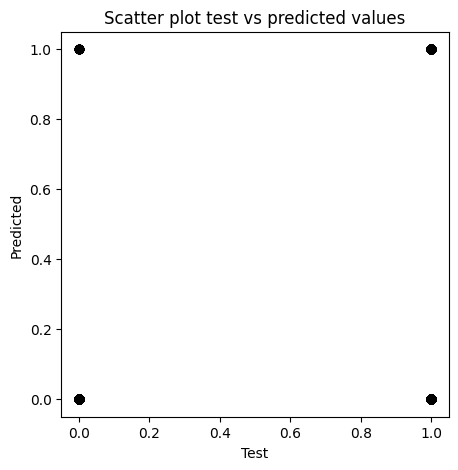

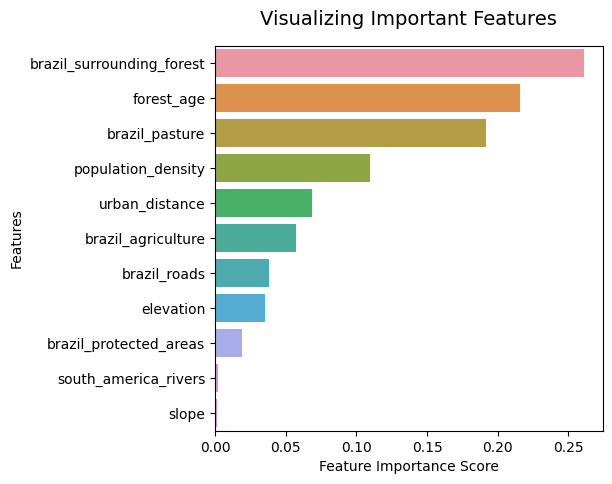

In [15]:
# On test set
y_pred_test, mae_test, mse_test, rmse_test, oob_score_test, r2_test, feature_imp_test = model_builder.evaluate(X_data=model_builder.X_test,
                                                                    y_data=model_builder.y_test,
                                                                    save_figures=False, saving_base_output_name='testing_test_set',
                                                                    feature_importance=True)

# Inference on tiles

In [ ]:
# model_builder.inference(mask_band='elevation', 
#                         tiles_folder_name='Sao_Paulo_Deforestation_Risk_inference_500km2_grid_scale30', 
#                         tiles_in_GCP=False,   # Running locally
#                         RF_output_folder_temp='RF_outputs_temp_Sao_Paulo_classifier_prob',
#                         path_to_tiles_local='/Users/margauxmforstyhe/Desktop/deforestation_risk/Sao_Paulo_Deforestation_Risk_inference_500km2_grid_scale30'
#                        )